In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [5]:
images, labels = mnist.train.next_batch(10)

In [8]:
# print (images[0])

In [9]:
print (labels[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


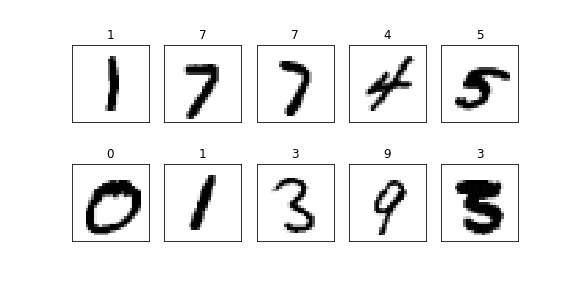

In [17]:
fig = plt.figure(figsize=(8,4))
for c, (image,label) in enumerate(zip(images,labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin = 0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160512)

In [20]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [21]:
x = tf.placeholder(tf.float32,[None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [22]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [24]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(x, 1))
accurracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [ ]:
i=0
for _ in range(2000):
    i+=1
    batch_xs, batch_cs = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:mnist.test.images, t:mnist.test.labels})
    
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy])